# Importing Libraries

In [188]:
import pandas as pd
%matplotlib inline
import numpy as np
import requests
import matplotlib.pyplot as plt
import json

#                                              Data Wrangling
## 1 - Data Gathering


### A file on hand >>> "twitter-archive-enhanced.csv"

In [189]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

### Programmatically Downloading  >>> "image-predictions.tsv"

In [190]:
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image-predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [191]:
image_predictions = pd.read_csv("image-predictions.tsv", sep = "\t")


### A file on hand >>> "tweet-json.txt"

In [192]:
#use json.loads(line) to convert line type from str to dict <<Note: eval() will not work here>> 
tweet_list = [json.loads(line) for line in open("tweet-json.txt", 'r')]

In [193]:
#get tweet_id,favorite_count,retweet_count in a separate dataframe
tweet_id,favorite_count,retweet_count = [],[],[]
for i in range(len(tweet_list)):
    tweet_id.append(tweet_list[i]['id'])
    favorite_count.append(tweet_list[i]['favorite_count'])
    retweet_count.append(tweet_list[i]['retweet_count'])
tweet_info_dic = {"tweet_id":tweet_id,"favorite_count":favorite_count,"retweet_count":retweet_count}
tweet_info= pd.DataFrame(tweet_info_dic)
tweet_info.head()
# save tweet_info as .csv file for visual assessment
tweet_info.to_csv("tweet_info.csv", index = False)

In [194]:
check = pd.read_csv("tweet_info.csv")
check.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Gathering summary
<font color='green'>

## we have 3 DataFrames
### 1 - twitter_archive
### 2- image_predictions
### 3- tweet_info</font>


## 2- Data Assessing
### Data Quality Dimensions

- Completeness: Do we have missing records or not? Are there specific rows, columns, or cells missing?
- Validity: Do we have invalid values for our coulmns?
- Accuracy: Do we have wrong valid values in our coulmns?
- Consistency: Do we have multible columns refer to same thing?

### Data Tidiness
 
- Every column is a variable.

- Every row is an observation.

* Every cell is a single value.



# 1- twitter_archive Dataframe

##  Visual Assessing

In [195]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None
2201,668645506898350081,NaN,NaN,2015-11-23 04:21:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Incredibly rare dog here. Good at bipedalism. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668645506...,11,10,None,None,None,None,None
1677,682059653698686977,NaN,NaN,2015-12-30 04:44:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tess. Her main passions are shelves an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682059653...,11,10,Tess,None,None,None,None
1157,724405726123311104,NaN,NaN,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,None,None,pupper,None
656,791780927877898241,NaN,NaN,2016-10-27 23:17:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maddie. She gets some w...,7.467577e+17,4.196984e+09,2016-06-25 17:31:25 +0000,"https://vine.co/v/5BYq6hmrEI3,https://vine.co/...",11,10,Maddie,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1204,716080869887381504,NaN,NaN,2016-04-02 01:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super majestic doggo and a sunset 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716080869...,11,10,None,doggo,None,None,None
1830,676219687039057920,NaN,NaN,2015-12-14 01:58:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,None,None,None,None
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,None,None,None,None
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,None,None,None,None


## Programmatic Assessing

In [196]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [197]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [198]:
twitter_archive["rating_numerator"].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [199]:
x = twitter_archive["rating_numerator"].value_counts()
x[x.index<10].sum()

440

In [200]:
twitter_archive["rating_denominator"].value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [201]:
y = twitter_archive["rating_denominator"].value_counts()
y[y.index!=10].sum()

23

In [202]:
twitter_archive.duplicated().sum()

0

# 2- image_predictions Dataframe

##  Visual Assessing

In [203]:
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
359,672622327801233409,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1,golden_retriever,0.952773,True,Labrador_retriever,0.010835,True,clumber,0.008786,True
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,Labrador_retriever,0.458746,True,Great_Dane,0.235504,True,Staffordshire_bullterrier,0.116864,True
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True
162,668955713004314625,https://pbs.twimg.com/media/CUibq3uVAAAup_O.jpg,1,cocker_spaniel,0.367492,True,Lakeland_terrier,0.272621,True,soft-coated_wheaten_terrier,0.067006,True
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True
1258,748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False
1018,710117014656950272,https://pbs.twimg.com/media/CdrXp9dWoAAcRfn.jpg,2,toy_poodle,0.802092,True,miniature_poodle,0.111647,True,cocker_spaniel,0.062866,True
727,686377065986265092,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,1,German_shepherd,0.830816,True,Leonberg,0.076325,True,bloodhound,0.037449,True


## Programmatic Assessing

In [204]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [205]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [206]:
image_predictions.duplicated().sum()

0

# 3- tweet_info Dataframe

##  Visual Assessing

In [207]:
tweet_info.sample(20)

,tweet_id,favorite_count,retweet_count
1631,684241637099323392,8999,3727
417,822462944365645825,31800,17209
773,776218204058357768,33345,18497
1564,687841446767013888,6009,2872
601,798644042770751489,0,2153
1601,685943807276412928,1801,696
1046,743253157753532416,4624,1366
1725,679877062409191424,2155,726
1121,730427201120833536,3809,1176
689,787397959788929025,12120,3300


## Programmatic Assessing

In [208]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [209]:
tweet_info.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [210]:
tweet_info.duplicated().sum()

0

# Quality Issues


## twitter_archive Dataframe
- 1-  181 non original ratings (retweets) should be removed.
- 2- Completeness: misssing values in columns (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,	retweeted_status_user_id, retweeted_status_timestamp,name,expanded_urls )
- 3- Validity: invalid values in "name" columns like(a,none)
- 4- Validity: invalid timestamp type (str) instead of (datetime)
- 5- Accuracy: 440 rating_numerator values are less than 10 also some values are very high [outliers].
- 6- Accuracy: 23 rating_denominator values are not equal to 10
## image_predictions Dataframe
- 7- Completeness: misssing id values in columns 2075 id compared to 2365 in  twitter_archive Dataframe so missing images.
- 8- inconsistency: some values in columns(p1,p2,p3) start with small letter while others start with capital one.
## tweet_info Dataframe
- 9- Completeness: misssing id values in columns 2354 id compared to 2365 in  twitter_archive Dataframe so missing data about favorite_count,retweet_count for some ids.


# Tidiness Issues
## twitter_archive Dataframe
- 1- Every cell is a single value: timestamp column has an observation that can be splited into separate columns[hour, month, day] for analysis.
- 2- Every column is a variable: (doggo, floofer, pupper, puppo) columns can be merged in one column.


## General
- 3- Tweet_info Dataframe and image_predictions Dataframe can be joined to twitter_archive Dataframe to form one detailed dataframe

# 3 - Data cleaning

In [227]:
# create copy of all 3 dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

## 1st Tidiness Issue
- Define: Extract dog stage (doggo, floofer, pupper, puppo) and merge them in one column called dog_stage, then drop (doggo, floofer, pupper, puppo) columns 

## Code

In [228]:
#extract dog stage in one column
dogs_stage = twitter_archive_clean['doggo'][twitter_archive_clean['doggo']!= "None"]
for i in ['floofer','pupper', 'puppo']:   
    dogs_stage = dogs_stage.append(twitter_archive_clean[i][twitter_archive_clean[i]!= "None"])

dogs_stage = dogs_stage.sort_index()

In [229]:
twitter_archive_clean = pd.merge(twitter_archive_clean, pd.DataFrame(dogs_stage,columns = ["dogs_stage"]), left_index=True, right_index=True,how = "left")
twitter_archive_clean = twitter_archive_clean.sort_index()

## Test

In [230]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,NaN


In [231]:
twitter_archive_clean.dogs_stage.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: dogs_stage, dtype: int64

# Iteration  ( Quality issue after merge) 

There is 2370 rows instead of 2356 but last index = 2355 so there is duplicated index should be removed

In [232]:
duplicates = twitter_archive_clean[twitter_archive_clean.index.duplicated()]
duplicates

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,doggo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,doggo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,doggo
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None,pupper
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None,pupper
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,pupper
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,pupper
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,doggo
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None,doggo
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None,doggo


In [233]:
#we can see that here
twitter_archive_clean.iloc[191:193]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,doggo


##### we have two identical rows with two different dogs_stage.

## Define: 
drop all duplicated index as they can introduce errors to our analysis.

## Code

In [234]:
#drop all duplicated index as they can introduce errors to our analysis.
twitter_archive_clean = twitter_archive_clean.drop(duplicates.index)
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,NaN


In [235]:
#reset index
twitter_archive_clean.reset_index()

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_stage
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,NaN
2338,2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,NaN
2339,2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,NaN
2340,2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,NaN


# Test

In [236]:
duplicates = twitter_archive_clean[twitter_archive_clean.index.duplicated()]
duplicates

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_stage


## Define: 
drop (doggo, floofer, pupper, puppo) columns

# Code

In [237]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

# Test

In [238]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogs_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN


# 2nd Tidiness Issue
## Define:
merge tweet_info Dataframe and image_predictions Dataframe to twitter_archive Dataframe to form one detailed dataframe 

# code

In [240]:
twitter_archive_clean = pd.merge(twitter_archive_clean,image_predictions_clean, on = "tweet_id", how = "left")
twitter_archive_clean = pd.merge(twitter_archive_clean,tweet_info_clean, on = "tweet_id", how = "left")

# Test

In [241]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,39467.0,8853.0


In [242]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2342 non-null   int64  
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2342 non-null   object 
 4   source                      2342 non-null   object 
 5   text                        2342 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2283 non-null   object 
 10  rating_numerator            2342 non-null   int64  
 11  rating_denominator          2342 non-null   int64  
 12  name                        2342 non-null   object 
 13  dogs_stage                  366 n

# Quality Issue
# Define: 
181 non original ratings (retweets) should be removed.

### Code

In [243]:
# First remove retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean["retweeted_status_id"].isna()]

### Test

In [244]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2341
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2163 non-null   int64  
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2163 non-null   object 
 4   source                      2163 non-null   object 
 5   text                        2163 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2105 non-null   object 
 10  rating_numerator            2163 non-null   int64  
 11  rating_denominator          2163 non-null   int64  
 12  name                        2163 non-null   object 
 13  dogs_stage                  332 n

## Quality Issue
- Define: drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns, and 'in_reply_to_status_id', 'in_reply_to_user_id' as they are useless for our analysis

### Code

In [245]:
# second drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns
twitter_archive_clean = twitter_archive_clean.drop(
    ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp",
     'in_reply_to_status_id', 'in_reply_to_user_id'],axis = 1)

### Test

In [246]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2341
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2163 non-null   int64  
 1   timestamp           2163 non-null   object 
 2   source              2163 non-null   object 
 3   text                2163 non-null   object 
 4   expanded_urls       2105 non-null   object 
 5   rating_numerator    2163 non-null   int64  
 6   rating_denominator  2163 non-null   int64  
 7   name                2163 non-null   object 
 8   dogs_stage          332 non-null    object 
 9   jpg_url             1983 non-null   object 
 10  img_num             1983 non-null   float64
 11  p1                  1983 non-null   object 
 12  p1_conf             1983 non-null   float64
 13  p1_dog              1983 non-null   object 
 14  p2                  1983 non-null   object 
 15  p2_conf             1983 non-null   float64
 16  p2_dog

## Quality Issue
- Define: make all rating_denominator values to be equal to 10

### Code

In [247]:
twitter_archive_clean["rating_denominator"] = 10

### Test

In [248]:
twitter_archive_clean.rating_denominator.value_counts()

10    2163
Name: rating_denominator, dtype: int64

## Quality Issue
- Define: change timestamp type to datetime

### Code

In [249]:
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])

## Test

In [250]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2341
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2163 non-null   int64              
 1   timestamp           2163 non-null   datetime64[ns, UTC]
 2   source              2163 non-null   object             
 3   text                2163 non-null   object             
 4   expanded_urls       2105 non-null   object             
 5   rating_numerator    2163 non-null   int64              
 6   rating_denominator  2163 non-null   int64              
 7   name                2163 non-null   object             
 8   dogs_stage          332 non-null    object             
 9   jpg_url             1983 non-null   object             
 10  img_num             1983 non-null   float64            
 11  p1                  1983 non-null   object             
 12  p1_conf             1983 non-null 

## Quality Issue
#### In image_predictions Dataframe Completeness issue: misssing id values in columns 1983 id compared to 2163 in twitter_archive Dataframe so missing images.

## Define:
Delete rows with missing data


## code

In [251]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean["p1"].isna()]

## Test

In [253]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2341
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1983 non-null   int64              
 1   timestamp           1983 non-null   datetime64[ns, UTC]
 2   source              1983 non-null   object             
 3   text                1983 non-null   object             
 4   expanded_urls       1983 non-null   object             
 5   rating_numerator    1983 non-null   int64              
 6   rating_denominator  1983 non-null   int64              
 7   name                1983 non-null   object             
 8   dogs_stage          295 non-null    object             
 9   jpg_url             1983 non-null   object             
 10  img_num             1983 non-null   float64            
 11  p1                  1983 non-null   object             
 12  p1_conf             1983 non-null 

## Quality Issue

- Define: make all values in columns(p1,p2,p3) start with capital letter.


## Code

In [254]:
twitter_archive_clean["p1"] = [element.title() for element in  twitter_archive_clean["p1"]]
twitter_archive_clean["p2"] = [element.title() for element in  twitter_archive_clean["p2"]]
twitter_archive_clean["p3"] = [element.title() for element in  twitter_archive_clean["p3"]]

###  Test

In [255]:
twitter_archive_clean["p1"]

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper_Towel
4                       Basset
                 ...          
2337        Miniature_Pinscher
2338       Rhodesian_Ridgeback
2339           German_Shepherd
2340                   Redbone
2341    Welsh_Springer_Spaniel
Name: p1, Length: 1983, dtype: object

In [256]:
twitter_archive_clean["p2"]

0                    Bagel
1                 Pekinese
2                 Malamute
3       Labrador_Retriever
4         English_Springer
               ...        
2337            Rottweiler
2338               Redbone
2339              Malinois
2340    Miniature_Pinscher
2341                Collie
Name: p2, Length: 1983, dtype: object

In [257]:
twitter_archive_clean["p3"]

0                            Banana
1                          Papillon
2                            Kelpie
3                           Spatula
4       German_Short-Haired_Pointer
                   ...             
2337                       Doberman
2338             Miniature_Pinscher
2339                     Bloodhound
2340            Rhodesian_Ridgeback
2341              Shetland_Sheepdog
Name: p3, Length: 1983, dtype: object

# Storing Data


In [258]:
twitter_archive_clean.to_csv("twitter_archive_master.csv",index= False)

In [259]:
df = pd.read_csv("twitter_archive_master.csv")
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogs_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

# Analyzing Data and Visualization

In [261]:
dogs_stage_count = twitter_archive_clean["dogs_stage"].value_counts()
dogs_stage_count

pupper     203
doggo       63
puppo       22
floofer      7
Name: dogs_stage, dtype: int64

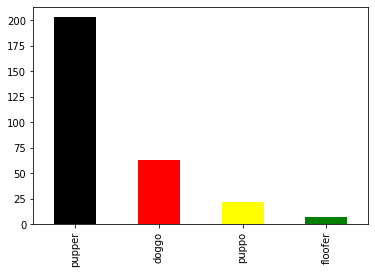

In [262]:
#plot BAR chart for dogs_stage_count
dogs_stage_count.plot(kind = 'bar',color = ["black","red","yellow","green"]);


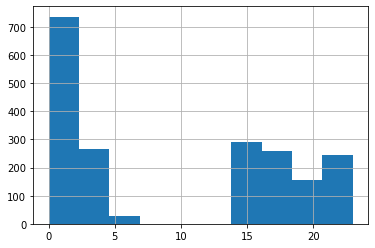

In [263]:
tweet_time= twitter_archive_clean.timestamp
tweet_time.dt.hour.hist();

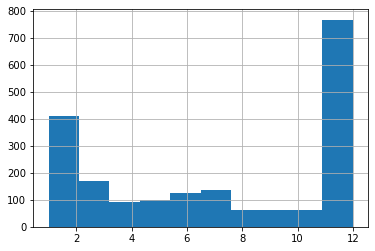

In [264]:
tweet_time.dt.month.hist();

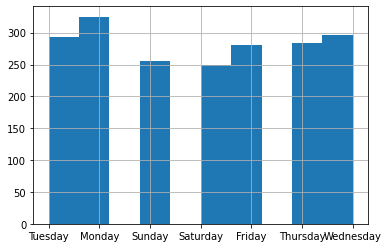

In [265]:
tweet_time.dt.day_name().hist();

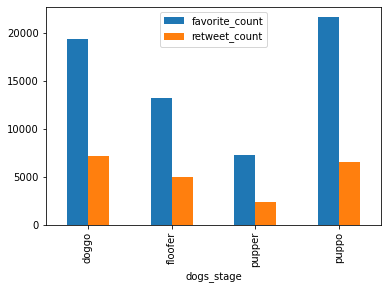

In [266]:
twitter_archive_clean.groupby(["dogs_stage"]).mean()[["favorite_count","retweet_count"]].plot(kind = "bar");

In [267]:
twitter_archive_clean["rating_numerator"].describe()

count    1983.000000
mean       12.286939
std        41.612332
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

<AxesSubplot:>

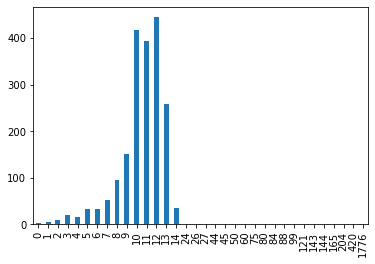

In [268]:
twitter_archive_clean["rating_numerator"].value_counts().sort_index().plot(kind = "bar")

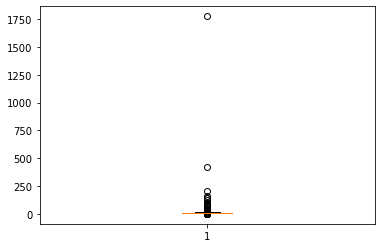

In [269]:
plt.boxplot(twitter_archive_clean["rating_numerator"].values);

# Insights

## From above analysis and  visualization we can the following insights:

<font color='red'>
    
### 1- "pupper" is the most dog satge tweeted.
### 2 - "floofer"  is the least dog satge tweeted.
### 3 - About [12 am : 2am]  is the most time that page is active.
### 4 - About [7 am : 2pm]  has the lowest activity.
### 5 - Monday  has the highest activity.
### 6 - satureday  has the lowest activity.
### 7-  The last two month of the year has the highest activity on the page.
### 8- "puppo" and "doggo" pictures are most liked and have more retweets.
### 9 - "rating_numerator" has some outliers.

